## IMAGE BINARIZATION FOR HANDWRITING OCR

v2 - EDA - Ross Kimberlin - 5/26/2022

In [1]:
import cv2
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
from scipy import misc, ndimage

%matplotlib inline

#### TESTING imageio vs PIL vs scipy vs numpy vs OpenCV -

SEE THE FOLLOWING ARTICLES:

https://codeguru.academy/?p=364

https://note.nkmk.me/en/python-numpy-opencv-image-binarization/

https://msameeruddin.hashnode.dev/binarization-of-image-using-numpy

## STEP 1) READ IMAGES INTO PYTHON AND INSPECT

### TESTING FIRST ON H-DIBCO 2016 IMAGES

#### TRYING imageio -

SEE https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/

In [2]:
read_dir_DIBCO = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [3]:
DIBCO_test_img_10 = imi.imread(read_dir_DIBCO + '10.bmp')

(315, 378, 3)
<class 'imageio.core.util.Array'>
uint8


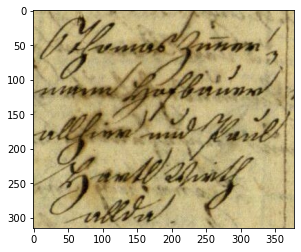

In [4]:
print(DIBCO_test_img_10.shape)
print(type(DIBCO_test_img_10))
print(DIBCO_test_img_10.dtype)

plt.imshow(DIBCO_test_img_10);

#### TRYING PIL - 

SEE https://codeguru.academy/?p=364

In [5]:
DIBCO_test_img_10_PIL = Image.open(read_dir_DIBCO + '10.bmp')

In [6]:
width, height = DIBCO_test_img_10_PIL.size
print(width, height)

378 315


In [7]:
print(DIBCO_test_img_10_PIL.mode)
print(DIBCO_test_img_10_PIL.size)

RGB
(378, 315)


In [8]:
print(DIBCO_test_img_10_PIL.format)
print(DIBCO_test_img_10_PIL.mode)
print(DIBCO_test_img_10_PIL.histogram())

BMP
RGB
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 3, 3, 8, 8, 11, 10, 14, 18, 14, 16, 20, 27, 27, 26, 26, 24, 33, 35, 44, 34, 47, 43, 47, 56, 41, 59, 61, 60, 84, 58, 52, 69, 72, 74, 66, 81, 93, 91, 105, 97, 92, 115, 126, 108, 113, 132, 116, 115, 137, 141, 123, 149, 122, 124, 140, 128, 145, 160, 139, 160, 160, 167, 165, 163, 155, 173, 186, 162, 189, 189, 202, 209, 192, 217, 195, 211, 176, 230, 200, 198, 254, 220, 243, 201, 242, 208, 228, 244, 216, 259, 246, 249, 236, 217, 271, 258, 256, 273, 232, 270, 267, 261, 261, 244, 252, 250, 296, 269, 268, 300, 286, 299, 260, 288, 286, 264, 269, 294, 301, 335, 271, 325, 326, 317, 317, 342, 306, 348, 342, 372, 356, 355, 356, 384, 422, 431, 410, 423, 438, 453, 452, 480, 482, 492, 518, 509, 543, 535, 585, 591, 582, 623, 584, 635, 677, 675, 752, 787, 787, 877, 899, 945, 970, 1016, 1103, 1076, 1203, 1222, 1282, 1359, 1419, 1529, 1612, 1722, 1805, 1924, 2067, 2104, 2184, 2195, 2216, 2315, 2491, 2520, 2448, 2505, 2609, 2559, 2559, 2631, 2561, 2605, 2449, 2387

## STEP 1a) TO DO - PLAY WITH IMAGE PRE-PROCESSING

#### DE-NOISING

<class 'numpy.ndarray'>


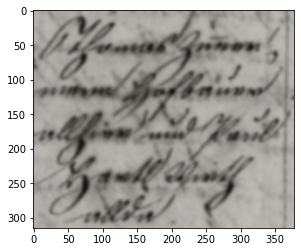

In [57]:
DTI_10_denoised_g = ndimage.gaussian_filter(DIBCO_test_img_10, 2)
 
print(type(DTI_10_denoised_g))    
plt.imshow(DTI_10_denoised_g)
plt.show()

<class 'numpy.ndarray'>


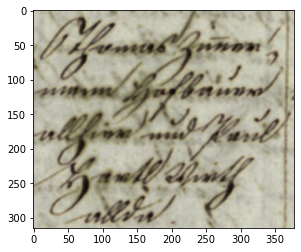

In [64]:
# MEDIAN FILTER DE-NOISING SEEMS TO LOOK THE BEST
DTI_10_denoised_m = ndimage.median_filter(DIBCO_test_img_10, 4)
 
print(type(DTI_10_denoised_m))    
plt.imshow(DTI_10_denoised_m)
plt.show()

In [11]:
read_dir_cBAD = '../data/READ-ICDAR2019-cBAD-dataset/eval/'

In [12]:
cBAD_test_img_1708 = imi.imread(read_dir_cBAD + 'cPAS-1708.jpg')

(2665, 2160, 3)
uint8


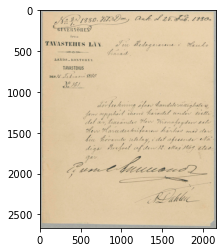

In [13]:
print(cBAD_test_img_1708.shape)
print(cBAD_test_img_1708.dtype)

plt.imshow(cBAD_test_img_1708);

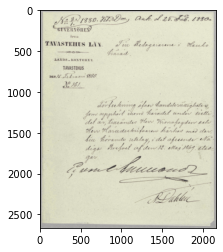

In [14]:
CTI_1708_denoised_m = ndimage.median_filter(cBAD_test_img_1708, 4)
 
plt.imshow(CTI_1708_denoised_m)
plt.show()

#### EDGE DETECTION

(GETS AN UNSUPPORTED DType ERROR FOR .bmp AND .jpg BOTH)

In [29]:
# x = ndimage.sobel(CTI_1708_denoised_m, axis=0, mode='constant')
# y = ndimage.sobel(CTI_1708_denoised_m, axis=1, mode='constant')
# Sob = np.hypot(x, y)
 
# plt.imshow(Sob)

#### CONVERTING TO numpy ARRAY - 

SEE https://codeguru.academy/?p=364

In [15]:
DTI_10_arr = np.array(DTI_10_denoised_m) # CAN ALSO USE np.asarray()
print(type(DTI_10_arr))
print(DTI_10_arr.shape)

<class 'numpy.ndarray'>
(315, 378, 3)


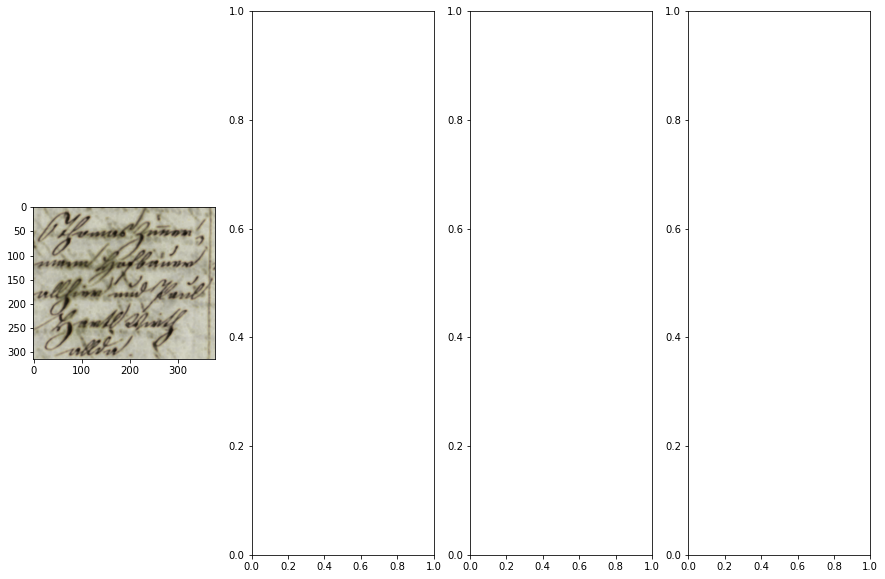

In [16]:
fig, axs = plt.subplots(1,4, figsize=(15, 10))
axs[0].imshow(DTI_10_arr)

In [26]:
DTI_10_gray = DTI_10_denoised_m.convert('L')

# DTI_10_bin = (DTI_10_gray > 128) * 255
# DTI_10_bin_keep = (DTI_10_gray > 128) * DTI_10_bin
# im_combined = np.concatenate((DTI_10_gray, 
#                               DTI_10_bin, 
#                               DTI_10_bin_keep), 
#                              axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

### TRYING OpenCV

USING CODE FROM THIS ARTICLE - 
https://note.nkmk.me/en/python-numpy-opencv-image-binarization/

In [17]:
thresh_1 = 128

DTI_10_bool = DTI_10_arr > thresh_1
print(DTI_10_bool)

[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]


In [19]:
maxval = 255

DTI_10_bin = (DTI_10_bool > thresh_1) * maxval
print(DTI_10_bin)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [34]:
Image.fromarray(np.uint8(DTI_10_bin)) \
    .save('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/output_v1/DTI_10_bin.png')

(315, 378, 3)
int64


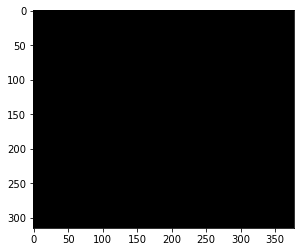

In [20]:
print(DTI_10_bin.shape)
print(DTI_10_bin.dtype)

plt.imshow(DTI_10_bin);

In [21]:
DTI_10_bin_keep = (DTI_10_arr > thresh_1) * DTI_10_arr
print(DTI_10_bin_keep)

[[[198 198 186]
  [198 198 186]
  [198 198 186]
  ...
  [196 196 178]
  [196 196 178]
  [196 196 178]]

 [[198 198 186]
  [198 198 186]
  [198 198 186]
  ...
  [196 196 178]
  [196 196 178]
  [196 196 178]]

 [[195 195 183]
  [195 195 183]
  [196 195 183]
  ...
  [197 196 178]
  [196 193 174]
  [192 192 174]]

 ...

 [[193 193 176]
  [192 192 175]
  [192 192 175]
  ...
  [205 205 188]
  [205 205 188]
  [205 205 188]]

 [[190 189 171]
  [190 190 171]
  [190 189 171]
  ...
  [211 211 194]
  [210 210 193]
  [210 210 193]]

 [[188 188 171]
  [188 188 171]
  [188 188 171]
  ...
  [211 211 194]
  [210 210 193]
  [210 210 193]]]


In [37]:
Image.fromarray(np.uint8(DTI_10_bin_keep)) \
    .save('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/output_v1/DTI_10_bin_keep.png')

In [22]:
print(Image.fromarray(np.uint8(DTI_10_bin_keep)))

<PIL.Image.Image image mode=RGB size=378x315 at 0x7FDC666D88E0>


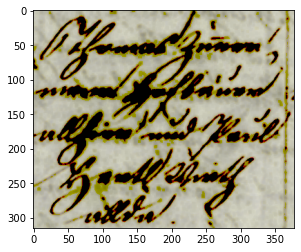

In [23]:
# THIS DOES NOT LOOK AS CLEAR AS ndimage MEDIAN DE-NOISING - WHAT HAS CHANGED?
plt.imshow(Image.fromarray(np.uint8(DTI_10_bin_keep)))

#### OpenCV -

SEE https://note.nkmk.me/en/python-numpy-opencv-image-binarization/

In [24]:
DIBCO_cv_test_img_9 = cv2.imread(read_dir_DIBCO + '9.bmp')

In [42]:
# retval, dst = cv2.threshold(src, thresh_1, maxval, type)

In [25]:
th_9, DIBCO_9_th = cv2.threshold(DIBCO_cv_test_img_9,
                                 128, 
                                 255,
                                 cv2.THRESH_TOZERO)

In [26]:
print(th_9)

128.0


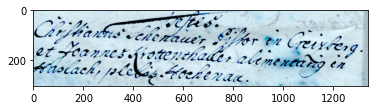

In [27]:
plt.imshow(Image.fromarray(DIBCO_9_th))

In [28]:
cv2.imwrite('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/output_v1/DIBCO_9_th.png',
            DIBCO_9_th)

True

#### OTSU AUTOMATIC THRESHOLDING

"Note that cv2.THRESH_OTSU and cv2.THRESH_TRIANGLE only support 8-bit single channel images as of version 4.2.0. An error will occur if a color image (three-dimensional array) is specified."

In [29]:
DTI_9_gray = cv2.cvtColor(DIBCO_cv_test_img_9,
                          cv2.COLOR_BGR2GRAY)

In [30]:
th_o, DTI_9_gray_th_o = cv2.threshold(DTI_9_gray,
                                      128,
                                      192,
                                      cv2.THRESH_OTSU)

In [31]:
print(th_o)

167.0


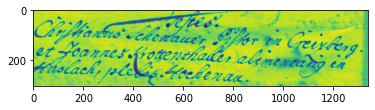

In [32]:
plt.imshow(DTI_9_gray)

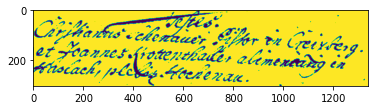

In [33]:
plt.imshow(Image.fromarray(DTI_9_gray_th_o))

In [53]:
cv2.imwrite('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/output_v1/DTI_9_gray_th_o.png',
            DTI_9_gray_th_o)

True

## STEP 2) TO DO - BINARIZE BLACK & WHITE

(PREFERRED OVER GRAYSCALE)

#### SEE https://stackoverflow.com/questions/34288776/binarization-of-image-in-opencv

Try out the following:

1.De-noise your image,first, by using either a Median,Bilateral,Gaussian or Adaptive Smooth Filter (Gaussian filter works pretty well when it comes to images with textual content).

2.De-blur the image by referring to http://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/ or https://github.com/tvganesh/deconv

3.Check out Adaptive Gaussian thresholding,instead.In case its a scene text image,you can use Otsu's algorithm after shadow removal. The 'Image Processing in OpenCV' tutorials have a detailed documentation on Image Thresholding.

The Image Filtering — OpenCV 3.0.0-dev documentation explains the implementation of the Median Blur, applied to an image.

#### SEE ALSO https://stackoverflow.com/questions/31289895/threshold-image-using-opencv-java/31290735#31290735

adaptiveThreshold is the right choice here. Just need a litte tuning. With these parameters (it's C++, but you can easily translate to Java)

Mat1b gray= imread("path_to_image", IMREAD_GRAYSCALE);
Mat1b result;
adaptiveThreshold(gray, result, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, 40);

### TRYING OpenCV's ADAPTIVE THRESHOLDING -

SEE https://medium.com/featurepreneur/dive-deeper-into-opencvs-adaptive-thresholding-3f29dda8c908

In [79]:
#read an image and convert it to grayscale

DTI_10_CV = cv2.imread('../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp')
DTI_10_gray = cv2.cvtColor(DTI_10_CV, 
                           cv2.COLOR_BGR2GRAY)

In [80]:
#apply normal and adaptive thresholding to the image

ret, thresh = cv2.threshold(DTI_10_gray, 
                            70, 
                            255, 
                            cv2.THRESH_BINARY)
adapt = cv2.adaptiveThreshold(DTI_10_gray,
                              255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,
                              99,
                              3)

In [ ]:
#create resizable windows for the images to be displayed

cv.namedWindow('adapt',
               cv.WINDOW_NORMAL)
cv.namedWindow('thresh', 
               cv.WINDOW_NORMAL)

In [ ]:
#show the image

cv.imshow('thresh', 
          thresh)
cv.imshow('adapt',
          adapt)

if cv.waitKey(0):
    cv.destroyAllWindows()

#### SEE CODE FROM https://medium.com/analytics-vidhya/binarization-of-image-using-numpy-65df2b82e189

In [67]:

def read_this(image_file, 
              gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, 
                                 cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, 
                                 cv2.COLOR_BGR2RGB)
    return image_src

In [69]:
def binarize_lib(image_file, 
                 thresh_val=127, 
                 with_plot=False, 
                 gray_scale=False):
    image_src = read_this(image_file=image_file, 
                          gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, 
                                thresh=thresh_val, 
                                maxval=255, 
                                type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, 
                                       ncols=2, 
                                       figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, 
                   cmap = cmap_val)
        ax2.imshow(image_b, 
                   cmap = cmap_val)
        return True
    return image_b

True

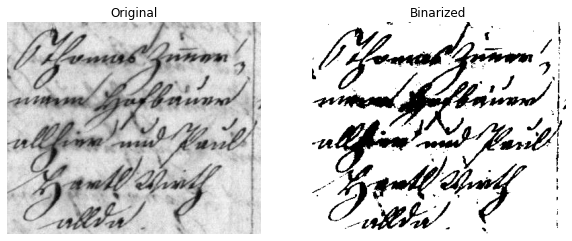

In [71]:
binarize_lib(image_file = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp', 
             with_plot  = True, 
             gray_scale = True)

In [72]:
def convert_binary(image_matrix, 
                   thresh_val):
    white = 255
    black = 0
    
    initial_conv = np.where((image_matrix <= thresh_val), 
                            image_matrix, 
                            white)
    final_conv = np.where((initial_conv > thresh_val), 
                          initial_conv, 
                          black)
    
    return final_conv

In [73]:
def binarize_this(image_file, 
                  thresh_val=127, 
                  with_plot=False, 
                  gray_scale=False):
    image_src = read_this(image_file=image_file, 
                          gray_scale=gray_scale)
    
    if not gray_scale:
        cmap_val = None
        r_img, g_img, b_img = image_src[:, :, 0], \
                              image_src[:, :, 1], \
                              image_src[:, :, 2]
        
        r_b = convert_binary(image_matrix=r_img, 
                             thresh_val=thresh_val)
        g_b = convert_binary(image_matrix=g_img, 
                             thresh_val=thresh_val)
        b_b = convert_binary(image_matrix=b_img, 
                             thresh_val=thresh_val)
        
        image_b = np.dstack(tup=(r_b, g_b, b_b))
    else:
        cmap_val = 'gray'
        image_b = convert_binary(image_matrix=image_src, 
                                 thresh_val=thresh_val)
    
    if with_plot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, 
                                       ncols=2, 
                                       figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, 
                   cmap=cmap_val)
        ax2.imshow(image_b, 
                   cmap=cmap_val)
        return True
    return image_b

True

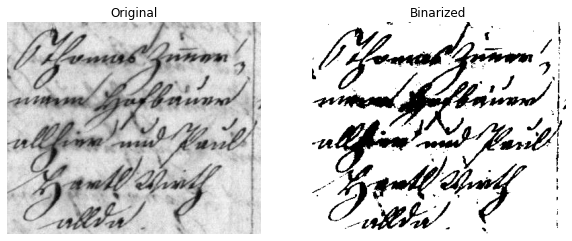

In [75]:
binarize_this(image_file = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp', 
              with_plot  = True, 
              gray_scale = True)

#### ALSO SEE CODE FROM https://medium.com/analytics-vidhya/image-simplification-through-binarization-in-opencv-1292d91cae12

In [44]:
ret_9_th, DTI_9_bin_th = cv2.threshold(DIBCO_cv_test_img_9, 
                                       140, 
                                       255, 
                                       cv2.THRESH_BINARY)

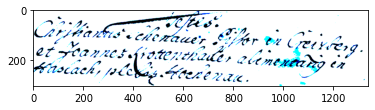

In [45]:
plt.imshow(DTI_9_bin_th)

In [46]:
hsv_DTI_9 = cv2.cvtColor(DIBCO_cv_test_img_9, 
                         cv2.COLOR_BGR2HSV)

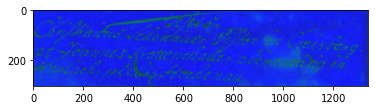

In [47]:
plt.imshow(hsv_DTI_9)

In [48]:
DTI_9_seg = cv2.inRange(hsv_DTI_9, 
                        np.array([-10, 50, 100]), 
                        np.array([50, 150, 225]))

In [49]:
cv2.imshow("segmentation", 
           DTI_9_seg)

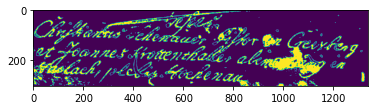

In [50]:
plt.imshow(DTI_9_seg)

In [60]:
#get rgb values from here: https://imagecolorpicker.com/en
rgbColor = np.uint8([[[92,113,165]]])
hsvColor = cv2.cvtColor(rgbColor, 
                        cv2.COLOR_BGR2HSV)

upper = np.array([hsvColor[0][0][0] + 10, 
                  hsvColor[0][0][1] + 10, 
                  hsvColor[0][0][2] + 40])
lower = np.array([hsvColor[0][0][0] - 10, 
                  hsvColor[0][0][1] - 10, 
                  hsvColor[0][0][2] - 40])

#### STEP 3 -- PROFIT??

### TO DO / NOT WORKING

SEE CODE FROM https://medium.com/@susmithreddyvedere/pre-processing-in-ocr-fc231c6035a7

In [46]:
ret_9_o_th, DTI_9_obin_th = cv2.threshold(DIBCO_cv_test_img_9,
                                          0,
                                          255,
                                          cv2.THRESH_BINARY,
                                          cv2.THRESH_OTSU)

In [50]:
# NOT WORKING

DTI_9_obin = cv2.adaptiveThreshold(DIBCO_cv_test_img_9,
                                   255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 
                                   11,
                                   2)

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


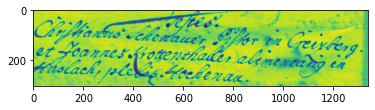

In [49]:
plt.imshow(DTI_9_obin)